In [1]:
%load_ext rpy2.ipython
%matplotlib inline
from matplotlib import pyplot as plt

from utils import functions2 as fxs2, functions as fxs1

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# call functions to plot
cls2 = fxs2.analysis2() 
cls1 = fxs1.analysis()
# set plot parameters
fxs2.plotParam()

<h3>Extended Data Fig. 1: TFBS mutation rate in bound/unbound regions </h3>

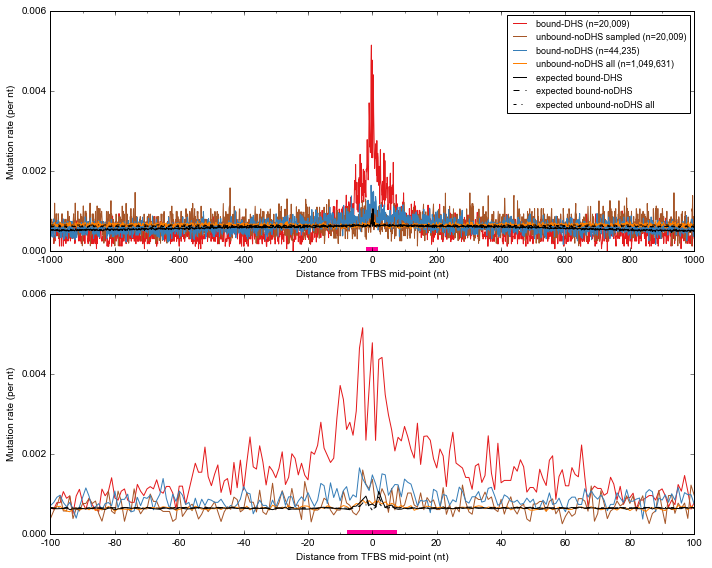

In [4]:
# read mutation rate results for bound and unbound TFs
cls2.read_TFBS_MutRate_unbound('skcm')

flanks=[1000, 100] # set x-axis limit for the flanks
legends={1000:1, 100:0} # show legend for only flank 1000

# define figure parameters
NROW = len(flanks)
NCOL = 1
fig = plt.figure(figsize=(10, 8))


axs=[]
for item in range(0, len(flanks)):
    axs.append(plt.subplot2grid((NROW, NCOL), (item, 0)))

count=0
for flk in flanks:
    cls2.plot_TFBS_MutRate_unbound(axs[count], 'skcm', flk, 'allTFs', legends[flk])
    count+=1

plt.tight_layout()
plt.show()

<h3> Extended Data Fig. 2: Elevated mutation rate at the binding sites of individual transcription
factors (TF) in melanoma </h3>

/home/sabari/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


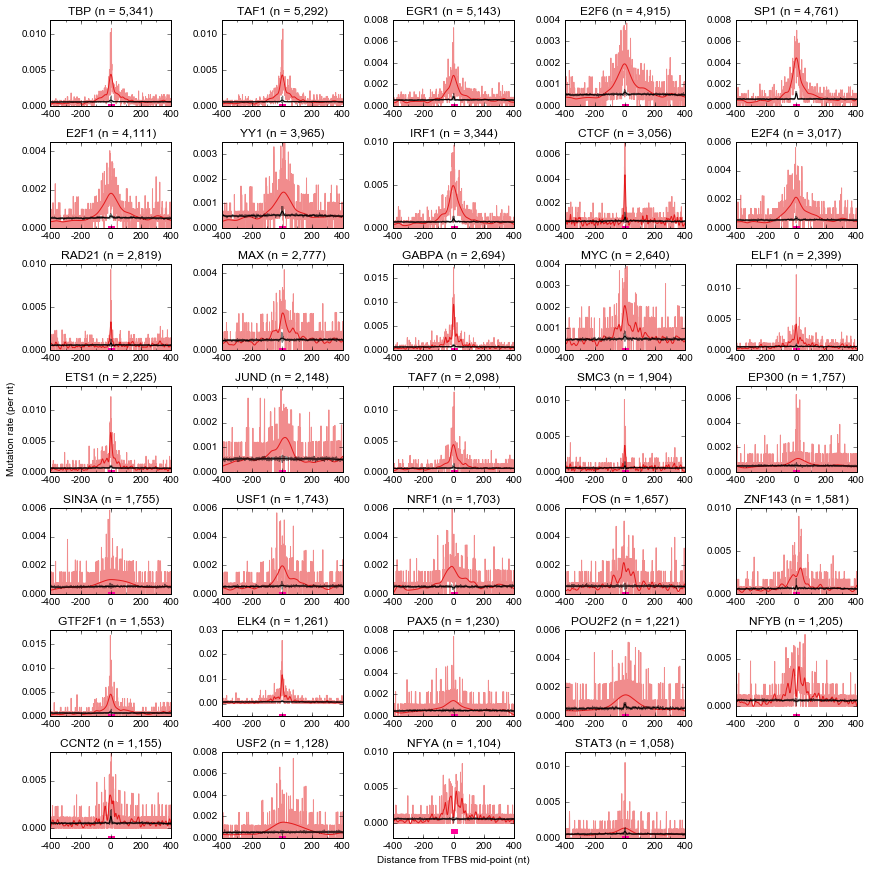

In [5]:
ctype = 'skcm' #cancertype ID

# read mutation rate results
cls1.read_TFBS_MutRate( ctype, "tfbs-proximal" ) #per TFBS and  all TFBS combined (aka. allTFs)
cls1.read_additionalFiles() # number of binding sites per TF

# get the list of TF that has minimum 1000 binding sites
tmp = cls1.perTF_enrichment[['motif', 'sites']][ (cls1.perTF_enrichment['ctype']=='skcm') &
                                               (cls1.perTF_enrichment['sites']>1000) ]

# sort with respect to number of binding sites
tmpSorted=tmp.sort(['sites'], ascending=False)

# get the motif names
tfLists = tmpSorted['motif'].tolist()

# plot figure
NCOL = 5
NROW = int(len(tfLists)/NCOL)

if (NROW * NCOL) < len(tfLists):
    NROW += 1

fig = plt.figure(figsize=(12, 12))

count = 0
axs=[]
for item in range(0, NROW):
    for col in range(0, NCOL):
        if count < len(tfLists):
            axs.append(plt.subplot2grid((NROW, NCOL), (item, col)))
            count += 1

# per TF mutate rate plot for selected TFs
selec_tfLists = tfLists

count=0
for tf in selec_tfLists:
    cls1.plot_TFBS_MutRate_perTF(axs[count], ctype, 400, tf, 0)
    count =  count + 1

plt.tight_layout(pad=0.3, h_pad=1)
plt.show()

<h3>Extended Data Fig. 3: Mutation rate at DHS sites in melanoma</h3>

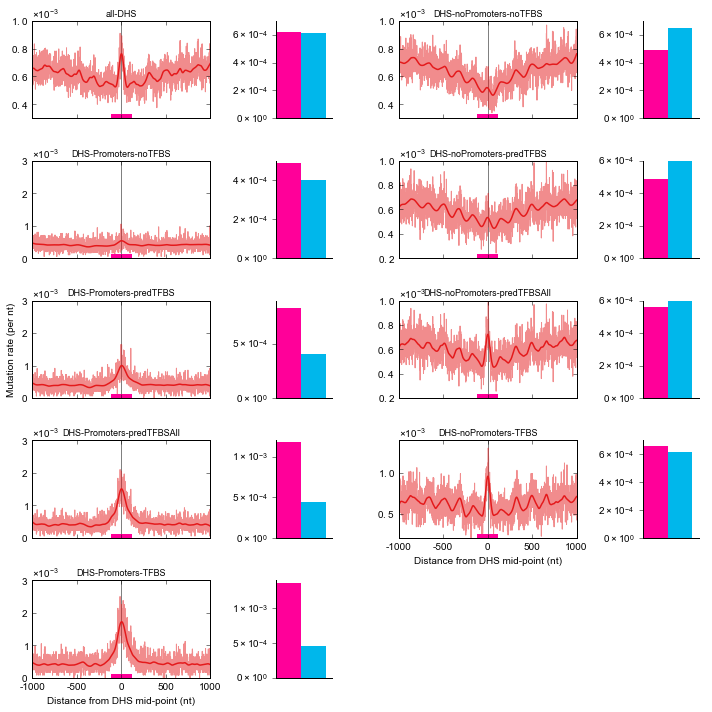

In [6]:
NROW = 5
NCOL = 6

fig = plt.figure(figsize=(10,  10), facecolor='white')

axs=[]

# for DHS alone and bar plot
for item in range(0, NROW):
    axs.append(plt.subplot2grid((NROW, NCOL), (item, 0), colspan=2))
    axs.append(plt.subplot2grid((NROW, NCOL), (item, 2)))
    
for item in range(0, NROW):
    axs.append(plt.subplot2grid((NROW, NCOL), (item, 3), colspan=2))
    axs.append(plt.subplot2grid((NROW, NCOL), (item, 5)))

count=0

cls1.read_DHS_MutRate(ctype) #mutation rate for DHS centered 

# DHS alone and bar plot
for atype in [ 'all-DHS', 'DHS-Promoters-noTFBS', 'DHS-Promoters-predTFBS', 'DHS-Promoters-predTFBSAll',
              'DHS-Promoters-TFBS', 'DHS-noPromoters-noTFBS', 'DHS-noPromoters-predTFBS', 
              'DHS-noPromoters-predTFBSAll','DHS-noPromoters-TFBS']:
    
    cls1.plot_DHS_MutRate(axs[count], axs[count+1], atype, ctype, 1000, "all")
    count = count + 2

# for the last empty plot set the axis off
axs[count].axis('off')
axs[count+1].axis('off')

plt.tight_layout()
plt.show()

<h3>Extended Data Fig. 4a: Regions around TFBS show a decrease in nucleotide excision repair </h3>

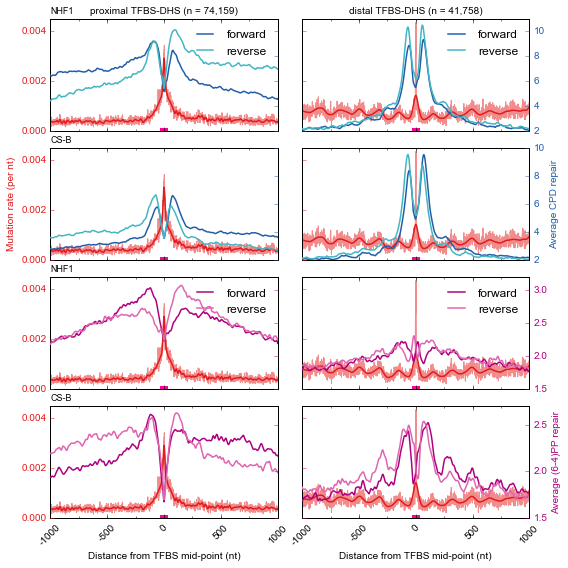

In [7]:
fig = plt.figure(figsize=(8, 8))
NROW = 4
NCOL = 2

axs=[]
for col in range(0, NCOL):
    for item in range(0, NROW):
        axs.append(plt.subplot2grid((NROW, NCOL), (item, col)))

count=0

# flags for axis control
title={'NHF1':'NHF1', 'CSB':'CS-B', 'XPC':'XP-C'}
rylim={'NHF1':{'PP64':[1.5, 3.2], 'CPD':[2,11]}, 
         'CSB':{'PP64':[1.5, 2.7], 'CPD':[2, 10]}, 'XPC':{'PP64':[0, 16], 'CPD':[0, 13]}}

for target in ['tfbs-proximal', 'tfbs-distal']:
    # read the mutation rate input file
    cls1.read_TFBS_MutRate(ctype, target)
    for pp in ['CPD', 'PP64' ]:
        for cellType in ['NHF1', 'CSB']:
            for flank in [ 1000 ]:
                if target == 'tfbs-proximal':
                    # set axisParam [title1, title2, xaxis, xlabel, Lyaxis, Lylabel, Ryaxis, Rylabel ]
                    axisParam = ["", title[cellType], 0, 0, 1, 0, 0, 0 ]
                    if cellType == 'NHF1' and pp=='CPD':
                        axisParam = ["proximal TFBS-DHS (n = 74,159)", title[cellType], 0, 0, 1, 0, 0, 0 ]
                    if cellType == 'CSB' and pp == 'CPD': 
                        axisParam = ["", title[cellType], 0, 0, 1, 1, 0, 0 ]
                    if cellType == 'CSB' and pp=='PP64':
                        axisParam = ["", title[cellType], 1, 1, 1, 0, 0, 0 ]
                else:
                    axisParam = ["", "", 0, 0, 0, 0, 1, 0 ]
                    if cellType == 'NHF1' and pp=='CPD':
                        axisParam = ["distal TFBS-DHS (n = 41,758)", "", 0, 0, 0, 0, 1, 0 ]
                    if cellType == 'CSB' and pp == 'CPD':
                        axisParam = ["", "", 0, 0, 0, 0, 1, 1 ]
                    if cellType == 'CSB' and pp=='PP64':
                        axisParam = ["", "", 1, 1, 0, 0, 1, 1 ]
                # plot values
                cls1.plot_TFBS_xrseq_combined_perCellType(axs[count], pp, cellType, ['PLUS','MINUS'], flank, 
                                                         "allTFs", axisParam, target, rylim[cellType][pp])
                count+=1

plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

<h3> Extended Data Fig. 4b: Decrease in nucleotide excision repair for individual TFs </h3>

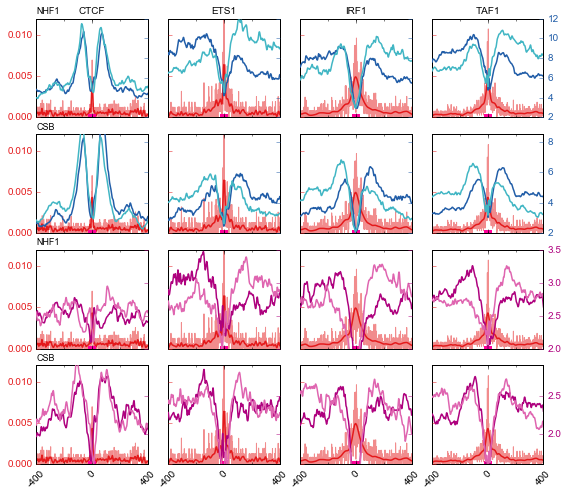

In [8]:
# selected TFs for example, that match with Fig 1b
tfLists = [ 'CTCF', 'ETS1', 'IRF1', 'TAF1' ]

flag=0

fig = plt.figure(figsize=(8,7))

axs=[]

NROW = 4
NCOL = len(tfLists)

for row in range(0, NROW):
    for col in range(0, NCOL):
        axs.append(plt.subplot2grid((NROW, NCOL), (row, col)))

rylim = { 'NHF1':{'PP64':[2.0, 3.5], 'CPD':[2.0, 12]}, 
           'CSB':{'PP64':[1.6,2.9], 'CPD':[2.0, 8.5]}, 
           'XPC':{'PP64':[2.5, 21], 'CPD':[2.0, 18]}}

count = 0
nrow=1
for pp in [ 'CPD', 'PP64' ]:

    for cellType in ['NHF1', 'CSB' ]:
        
        for tfcnt, tf in enumerate(tfLists):
            # set axisParam [title, xaxis, xlabel, Lyaxis, Lylabel, Ryaxis, Rylabel ]
            axisParam = [ tf, cellType,  0, 0, 1, 0, 0, 0 ] # default set
            if nrow != 1:
                axisParam = [ "", cellType,  0, 0, 1, 0, 0, 0 ]
            if tfcnt > 0 and tfcnt < len(tfLists)-1:
                axisParam = [ "", "", 0, 0, 0, 0, 0, 0 ]
                if nrow == 1:
                    axisParam = [ tf, "", 0, 0, 0, 0, 0, 0 ]
            if nrow == NROW:
                if tfcnt == 0:
                    axisParam = [ "", cellType,  1, 0, 1, 0, 0, 0 ] 
                else:
                    axisParam = [ "", "",  1, 0, 0, 0, 0, 0 ] 
            if tfcnt == len(tfLists)-1:
                if nrow == NROW:
                    axisParam = [ "", "",  1, 0, 0, 0, 1, 0 ] 
                else:
                    axisParam = [ "", "",  0, 0, 0, 0, 1, 0 ]
                    if nrow == 1:
                        axisParam = [ tf, "",  0, 0, 0, 0, 1, 0 ]
                    
            # plot the values
            cls1.plot_TFBS_xrseq_combined_perCellType(axs[count], pp, cellType, ['PLUS', 'MINUS'], 
                                                     400, tf, axisParam, 'tfbs-proximal', 
                                                     rylim[cellType][pp])
            count+=1
        nrow+=1

plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

<h3>Extended Data Fig. 5: Mutation/repair rate in TFBS correlate with the strength of the binding signal of TFs to their sites. </h3>

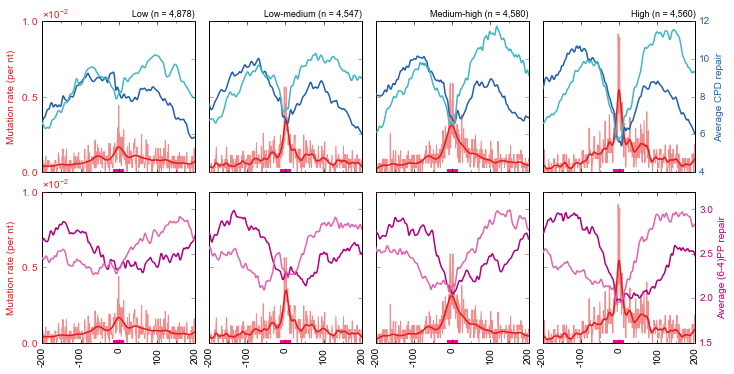

In [9]:
fig = plt.figure(figsize=(10, 5))
NROW = 2
NCOL = 4


axs=[]
for item in range(0, NROW):
    for col in range(0, NCOL):
        axs.append(plt.subplot2grid((NROW, NCOL), (item, col)))
        
count=0

# flags for axis control
yaxis={'PP64':1, 'CPD':1}
xlabel={1000:0, 500:0, 100:1}
title={'NHF1':'NHF1', 'CSB':'CS-B', 'XPC':'XP-C'}
rylim={'NHF1':{'PP64':[1.5, 3.2], 'CPD':[4,12]}, 
         'CSB':{'PP64':[1.5, 2.7], 'CPD':[4, 12]}, 'XPC':{'PP64':[0, 16], 'CPD':[0, 18]}}

flank=200

sites={'Low':'4,765', 'Low-medium':'4,445', 'Medium-high':'4,426', 'High':'4,367'}
# for proximal TFBS-DHS
pp='CPD'
cellType='NHF1'
target='tfbs-bs-seperated'
for cellType in ['NHF1']:
    title='Low (n = 4,878)'
    # set axisParam [title, xaxis, xlabel, Lyaxis, Lylabel, Ryaxis, Rylabel ]2
    axisParam = [title, "", 0, 0, 1, 1, 0, 0 ]
    # plot values
    cls1.plot_TFBS_xrseq_combined_perCellType(axs[count], pp, cellType, ['PLUS','MINUS'], 
                                             flank, "allTFs_0", axisParam, target, rylim[cellType][pp])
    count+=1

    title='Low-medium (n = 4,547)'
    # set axisParam [title, xaxis, xlabel, Lyaxis, Lylabel, Ryaxis, Rylabel ]
    axisParam = [title, "", 0, 0, 0, 0, 0, 0 ]
    # plot values
    cls1.plot_TFBS_xrseq_combined_perCellType(axs[count], pp, cellType, ['PLUS','MINUS'], 
                                             flank, "allTFs_1", axisParam, target, rylim[cellType][pp])
    count+=1

    title='Medium-high (n = 4,580)'
    # set axisParam [title, xaxis, xlabel, Lyaxis, Lylabel, Ryaxis, Rylabel ]
    axisParam = [title, "", 0, 0, 0, 0, 0, 0 ]
    # plot values
    cls1.plot_TFBS_xrseq_combined_perCellType(axs[count], pp, cellType, ['PLUS','MINUS'], 
                                             flank, "allTFs_2", axisParam, target, rylim[cellType][pp])
    count+=1

    title='High (n = 4,560)'
    # set axisParam [title, xaxis, xlabel, Lyaxis, Lylabel, Ryaxis, Rylabel ]
    axisParam = [title, "", 0, 0, 0, 0, 1, 1 ]
    # plot values
    cls1.plot_TFBS_xrseq_combined_perCellType(axs[count], pp, cellType, ['PLUS','MINUS'], 
                                             flank, "allTFs_3", axisParam, target, rylim[cellType][pp])
    count+=1

pp='PP64'
for cellType in ['NHF1']:

    # set axisParam [title, xaxis, xlabel, Lyaxis, Lylabel, Ryaxis, Rylabel ]
    axisParam = ["", "", 1, 0, 1, 1, 0, 0 ]
    # plot values
    cls1.plot_TFBS_xrseq_combined_perCellType(axs[count], pp, cellType, ['PLUS','MINUS'], 
                                             flank, "allTFs_0", axisParam, target, rylim[cellType][pp])
    count+=1
    
    # set axisParam [title, xaxis, xlabel, Lyaxis, Lylabel, Ryaxis, Rylabel ]
    axisParam = ["", "", 1, 0, 0, 0, 0, 0 ]
    # plot values
    cls1.plot_TFBS_xrseq_combined_perCellType(axs[count], pp, cellType, ['PLUS','MINUS'], 
                                             flank, "allTFs_1", axisParam, target, rylim[cellType][pp])
    count+=1

    # set axisParam [title, xaxis, xlabel, Lyaxis, Lylabel, Ryaxis, Rylabel ]
    axisParam = ["", "", 1, 0, 0, 0, 0, 0 ]
    # plot values
    cls1.plot_TFBS_xrseq_combined_perCellType(axs[count], pp, cellType, ['PLUS','MINUS'], 
                                             flank, "allTFs_2", axisParam, target, rylim[cellType][pp])
    count+=1
    
    # set axisParam [title, xaxis, xlabel, Lyaxis, Lylabel, Ryaxis, Rylabel ]
    axisParam = ["", "", 1, 0, 0, 0, 1, 1 ]
    # plot values
    cls1.plot_TFBS_xrseq_combined_perCellType(axs[count], pp, cellType, ['PLUS','MINUS'], 
                                             flank, "allTFs_3", axisParam, target, rylim[cellType][pp])
    count+=1
    

plt.tight_layout(pad=0, w_pad=0.5)
plt.show()

<h3>Extended Data Fig. 6: Nucleotide excision repair and mutation rate in DHS centered regions</h3>

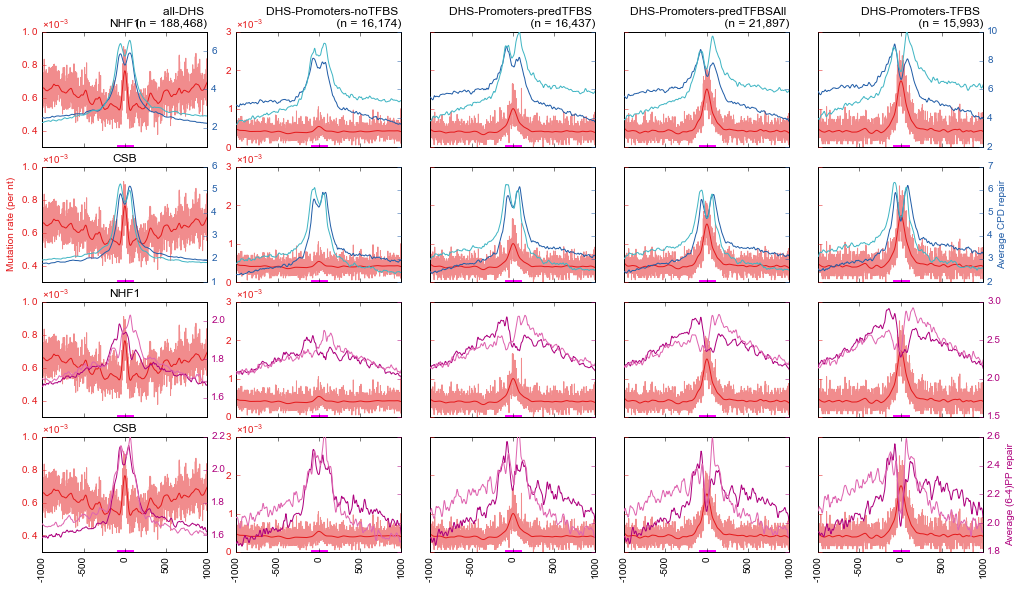

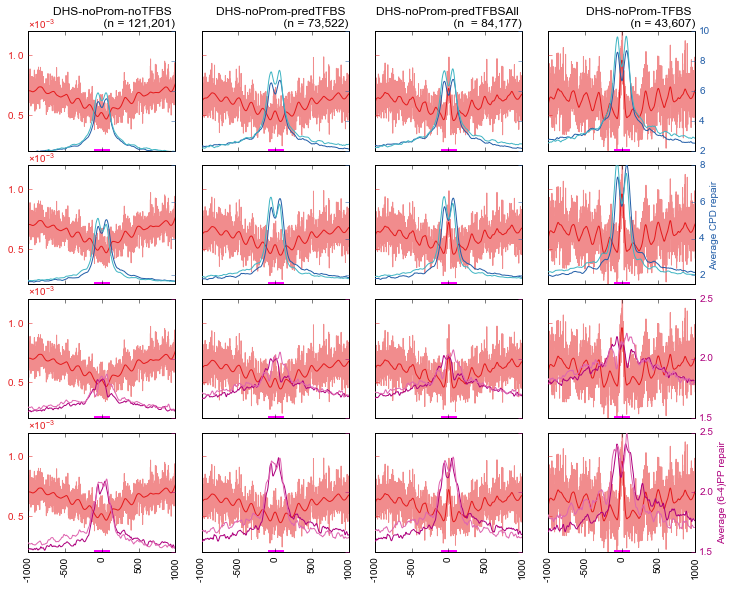

In [10]:
# read DHS mutation rate data
cls1.read_DHS_MutRate('skcm')

# set axisParam [title, title2, xaxis, xlabel, Lyaxis, Lylabel, Ryaxis, Rylabel, Lyaxislimit, Ryaxislimit ]
axisParams={ 
    'CPD':{
        
        'all-DHS':{
            'NHF1':["all-DHS \n (n = 188,468)", "NHF1", 0, 0, 1, 0, 1, 0, (0.0003,0.001), (1,7) ], 
            'CSB':["", "CSB", 0, 0, 1, 1, 1, 0, (0.0003,0.001), (1,6) ] },
                    
        'DHS-Promoters-noTFBS':{
            'NHF1':["DHS-Promoters-noTFBS \n (n = 16,174)", "", 0, 0, 1, 0, 0, 0, (0, 0.003), (2,10) ], 
            'CSB':["", "", 0, 0, 1, 0, 0, 0, (0, 0.003), (2,7) ] },
                    
        'DHS-Promoters-predTFBS':{
            'NHF1':["DHS-Promoters-predTFBS \n (n = 16,437)", "", 0, 0, 0, 0, 0, 0, (0, 0.003), (2,10) ], 
            'CSB':["", "", 0, 0, 0, 0, 0, 0, (0, 0.003), (2,7) ] },
                    
        'DHS-Promoters-predTFBSAll':{
            'NHF1':["DHS-Promoters-predTFBSAll \n (n = 21,897)", "", 0, 0, 0, 0, 0, 0, (0, 0.003), (2,10) ], 
            'CSB':["", "", 0, 0, 0, 0, 0, 0, (0, 0.003), (2,7) ] },
        
        'DHS-Promoters-TFBS':{
            'NHF1':["DHS-Promoters-TFBS \n (n = 15,993)", "", 0, 0, 0, 0, 1, 0, (0, 0.003), (2,10) ], 
            'CSB':["", "", 0, 0, 0, 0, 1, 1, (0, 0.003), (2,7) ] },
                    
        'DHS-noPromoters-noTFBS':{
            'NHF1':["DHS-noProm-noTFBS \n (n = 121,201)", "", 0, 0, 1, 0, 0, 0, (0.0002, 0.0012), (2,10) ], 
            'CSB':["", "", 0, 0, 1, 0, 0, 0, (0.0002, 0.0012), (1.5,8) ] },
        
        'DHS-noPromoters-predTFBS':{
            'NHF1':["DHS-noProm-predTFBS \n (n = 73,522)", "", 0, 0, 0, 0, 0, 0, (0.0002, 0.0012), (2,10) ], 
            'CSB':["", "", 0, 0, 0, 0, 0, 0, (0.0002, 0.0012), (1.5,8) ] },
                    
        'DHS-noPromoters-predTFBSAll':{
            'NHF1':["DHS-noProm-predTFBSAll \n (n  = 84,177)", "", 0, 0, 0, 0, 0, 0, (0.0002,0.0012), (2,10) ], 
            'CSB':["", "", 0, 0, 0, 0, 0, 0, (0.0002,0.0012), (1.5,8) ] },      
                    
        'DHS-noPromoters-TFBS':{
            'NHF1':["DHS-noProm-TFBS \n (n = 43,607)", "", 0, 0, 0, 0, 1, 0, (0.0002, 0.0012), (2,10) ], 
            'CSB':["", "", 0, 0, 0, 0, 1, 1, (0.0002, 0.0012), (1.5,8) ] }               
        },
    
    
    'PP64':{
        'all-DHS':{
            'NHF1':["", "NHF1", 0, 0, 1, 0, 1, 0, (0.0003,0.001), (1.5, 2.1) ], 
            'CSB':["", "CSB", 1, 0, 1, 0, 1, 0, (0.0003,0.001), (1.5,2.2) ] },
                    
        'DHS-Promoters-noTFBS':{
            'NHF1':["", "", 0, 0, 1, 0, 0, 0, (0, 0.003), (1.5, 3) ], 
            'CSB':["", "", 1, 0, 1, 0, 0, 0, (0, 0.003), (1.8, 2.6) ] },
                    
        'DHS-Promoters-predTFBS':{
            'NHF1':["", "", 0, 0, 0, 0, 0, 0, (0, 0.003), (1.5, 3) ], 
            'CSB':["", "", 1, 0, 0, 0, 0, 0, (0, 0.003), (1.8, 2.6) ] },
                    
        'DHS-Promoters-predTFBSAll':{
            'NHF1':["", "", 0, 0, 0, 0, 0, 0, (0, 0.003), (1.5, 3) ], 
            'CSB':["", "", 1, 0, 0, 0, 0, 0, (0, 0.003), (1.8, 2.6) ] },
        
        'DHS-Promoters-TFBS':{
            'NHF1':["", "", 0, 0, 0, 0, 1, 0, (0, 0.003), (1.5, 3) ], 
            'CSB':["", "", 1, 0, 0, 0, 1, 1, (0, 0.003), (1.8, 2.6) ] },
                    
        'DHS-noPromoters-noTFBS':{
            'NHF1':["", "", 0, 0, 1, 0, 0, 0, (0.0002,0.0012), (1.5, 2.5) ], 
            'CSB':["", "", 1, 1, 1, 0, 0, 0, (0.0002,0.0012), (1.5,2.5) ] },
        
        'DHS-noPromoters-predTFBSAll':{
            'NHF1':["", "", 0, 0, 0, 0, 0, 0, (0.0002,0.0012), (1.5, 2.5) ], 
            'CSB':["", "", 1, 1, 0, 0, 0, 0, (0.0002,0.0012), (1.5,2.5) ] },
                    
        'DHS-noPromoters-predTFBS':{
            'NHF1':["", "", 0, 0, 0, 0, 0, 0, (0.0002, 0.0012), (1.5, 2.5) ], 
            'CSB':["", "", 1, 0, 0, 0, 0, 0, (0.0002, 0.0012), (1.5, 2.5) ] },
        
        'DHS-noPromoters-TFBS':{
            'NHF1':["", "", 0, 0, 0, 0, 1, 0, (0.0002, 0.0012), (1.5, 2.5) ], 
            'CSB':["", "", 1, 0, 0, 0, 1, 1, (0.0002, 0.0012), (1.5, 2.5) ] }
            }
       }


# plot all DHS and proximal DHS
NROW = 4
NCOL = 5
fig = plt.figure(figsize=(14, 8))
axs=[]
for row in range(0, NROW):
    for item in range(0, NCOL):
        axs.append(plt.subplot2grid((NROW, NCOL), (row, item)))

count=0
for pp in [ 'CPD', 'PP64' ]:
    
    for cellType in ['NHF1', 'CSB']:

        for atype in ['all-DHS', 'DHS-Promoters-noTFBS', 'DHS-Promoters-predTFBS', 'DHS-Promoters-predTFBSAll',
                      'DHS-Promoters-TFBS',]:
            
            cls1.plot_DHS_xrseq_combined_perCellType(axs[count], cellType, pp, ['PLUS', 'MINUS'], 
                                                    atype, ctype, axisParams[pp][atype][cellType])
            count+=1
                
plt.tight_layout(pad=0.005, w_pad=0.005)
plt.show()

# plot for distal DHS
NROW = 4
NCOL = 4

fig = plt.figure(figsize=(10, 8))
axs=[]

# for DHS alone and bar plot
for row in range(0, NROW):
    for item in range(0, NCOL):
        axs.append(plt.subplot2grid((NROW, NCOL), (row, item)))

count=0
for pp in [ 'CPD', 'PP64' ]:
    
    for cellType in ['NHF1', 'CSB']:

        for atype in ['DHS-noPromoters-noTFBS', 'DHS-noPromoters-predTFBS', 'DHS-noPromoters-predTFBSAll',
                      'DHS-noPromoters-TFBS']:
            cls1.plot_DHS_xrseq_combined_perCellType(axs[count], cellType, pp, ['PLUS', 'MINUS'],
                                                    atype, ctype, axisParams[pp][atype][cellType])
            count+=1
            
        
plt.tight_layout(pad=0.005, w_pad=0.005)
plt.show()

<h3>Extended Data Figure 7: Transcription coupled-repair is impaired at active TFBS</h3>

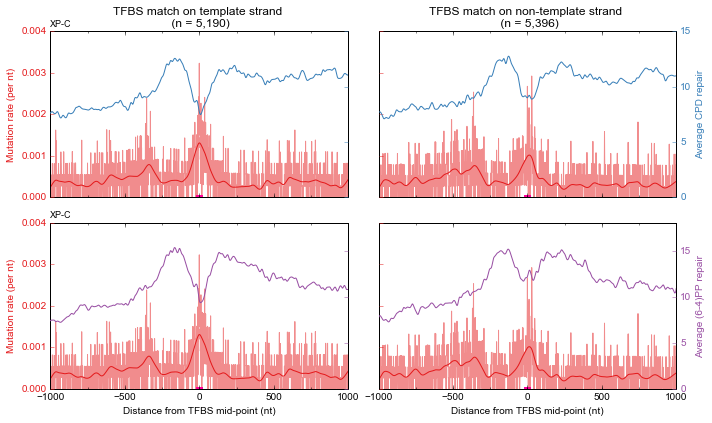

In [11]:
fig = plt.figure(figsize=(10, 6), facecolor='w')

NROW=2
NCOL=2
axs=[]
for item in range(0, NROW):
    for col in range(0, NCOL):
        axs.append(plt.subplot2grid((NROW,NCOL), (item, col)))

count=0

ylimits={'XPC':{'PP64':[0, 18], 'CPD':[0, 15]}}
cell = 'XPC'

for pp in [ 'CPD', 'PP64' ]:
    for ttype in [ 'template', 'nontemplate' ]:
        cls2.read_TFBSmutrate_tss(ttype)
        cls2.plot_TFBSxreq_tssDownstream(axs[count], ttype, ttype, cell, pp, ylimits[cell][pp])
        count += 1

plt.tight_layout(h_pad=1, w_pad=0.5)
plt.show()

<h3>Extended Data Fig. 8: Mutation rate around TFBS in other cancer types</h3>

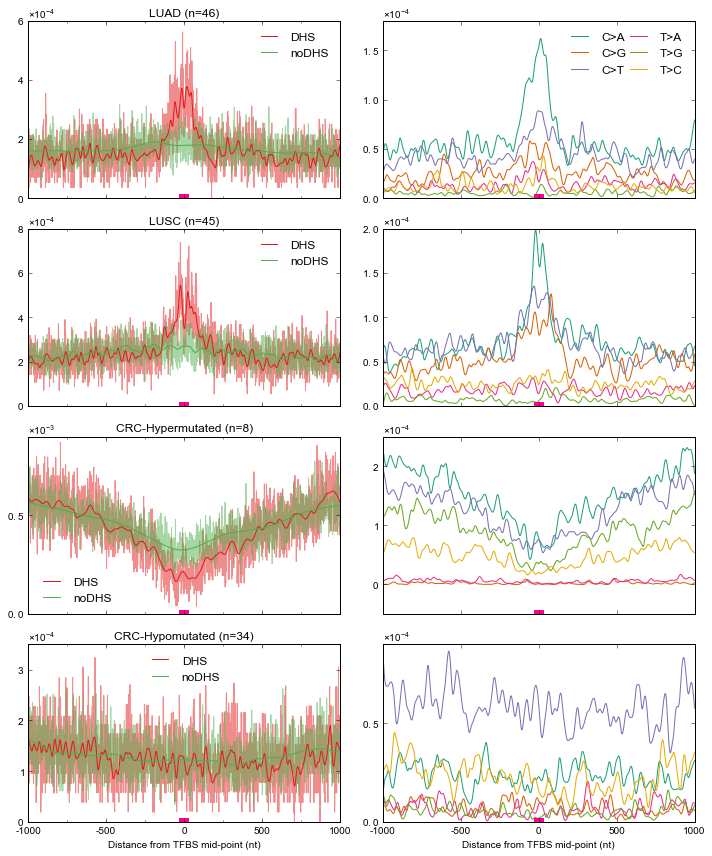

In [12]:
fig = plt.figure(figsize=(10, 12))

ctypes=['luad', 'lusc', 'crcHyper', 'crcHypo']

NROW = len(ctypes)

NCOL = 2

axs=[]
for item in range(0, NROW):
    for col in range(0, NCOL):
        axs.append(plt.subplot2grid((NROW, NCOL), (item, col)))

count=0

flk=1000
for ctype in ctypes:
    # read mutation rate results
    cls2.read_TFBS_MutRate(ctype, "tfbs-proximal" ) #per TFBS and  all TFBS combined (aka. allTFs)
    cls2.read_TFBS_MutRate_perMutType(ctype) # allTFs results sep. by mutation type 
    # plot mutation rate
    cls2.plot_TFBS_MutRate_perCtype(axs[count], ctype, flk, 'allTFs', 1)
    count+=1
    cls2.read_TFBS_MutRate_perMutType(ctype)
    cls2.plot_TFBS_MutRate_perMutType(axs[count], ctype, ctype, [ 'CA' , 'CG', 'CT', 'TA', 'TG', 'TC' ], count)
    count+=1

plt.tight_layout()
plt.show()

<h3> Extended Data Fig. 9: Mutation enrichment around TFBS across cancer types</h3>

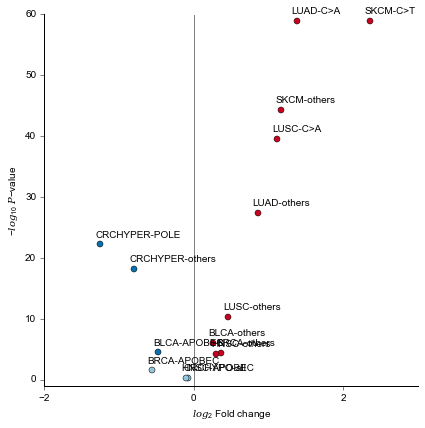

In [13]:
NROW = 1
NCOL = 1

fig = plt.figure(figsize=(6, 6))
axs=[]
for item in range(0, NROW):
    for col in range(0, NCOL):
        axs.append(plt.subplot2grid((NROW, NCOL), (item, col)))

# enrichment plot
count=0
# read the signature enrichment file
cls2.read_signatureEnrichment()
# plot the enrichment output
cls2.plot_signatureEnrichment(axs[count])
count += 1

plt.tight_layout(h_pad=0.5)
plt.show()